<a href="https://colab.research.google.com/github/JonathanBath/summer-school/blob/master/AnalyseMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will show a plot of the simulation trajectory

Three moecular dynamics simulations were run at the univeristy computing facility (each one ran for 8 hours).

Compare the three simulations (change the line `bonds = one` in the code below

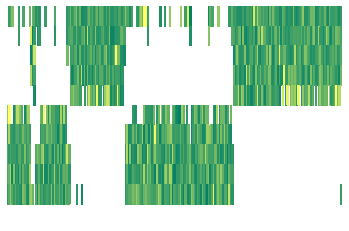

In [21]:
one = '/content/summer-school/one/bonds.txt'
two = '/content/summer-school/two/bonds.txt'
three = '/content/summer-school/three/bonds.txt'

# change bonds for one, two or three to load simulation one, two or three
bonds = one

import pandas as pd
import numpy as np
import seaborn as sns

names = ['id1','id2','FENE','BEXC','STCK','NEXC','HB','CRSTCK','CXSTCK','DH','total']

data = pd.read_csv(bonds, sep=' ', comment='#', names=names)
time_steps = data.index[(data['id1']==0)&(data['id2']==1)].tolist()
time_steps.append(-1)
trajectory = [data.iloc[start:end].set_index(['id1','id2']) for start, end in zip(time_steps[0:-2],time_steps[1:])]

rules = [(15,61),(16,60),(17,59),(18,58),(19,57),(20,56),(16,55),(17,54),(18,53),(19,52),(20,51)]

filtered_trajectory = [timestep[timestep.index.isin(rules)] for timestep in trajectory]
mask = pd.DataFrame(rules, columns=['id1','id2']).set_index(['id1','id2']);
rule_trajectory = [timestep.add(mask, fill_value=0).fillna(0).HB for timestep in filtered_trajectory]
rule_trajectory = pd.concat(rule_trajectory,axis=1)
rule_trajectory = rule_trajectory.reset_index().sort_values(by=['id2'])
fig = sns.heatmap(rule_trajectory['HB'].replace(0,np.nan), cmap='summer', xticklabels=False, yticklabels=False, cbar=False)


The simulation runs from left to right (so the x-axis is something similar to time).

Each horizontal slice represents one snapshot of the simulation and shows which positions are base paired at that instant (green for the strongest interaction fading to yellow for the weakest interaction, white if there is no interaction).

You can see that the plot divides horizontally into two halves, the top half is green when the transfer strand has won the competition, the bottom half is green when the transfer strand has won the competition.